In [1]:
import galsim
from om10 import DB
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
realizer_path = os.path.join(os.environ['SLREALIZERDIR'], 'slrealizer')
sys.path.insert(0, realizer_path)
from realize_om10 import OM10Realizer
from utils.utils import *
#from realize_sl import SLRealizer

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data_path = os.path.join(os.environ['SLREALIZERDIR'], 'data')

test_catalog_f = os.path.join(data_path, 'test_catalog.fits')
observation_f = os.path.join(data_path, 'twinkles_observation_history.csv')

In [3]:
test_db = DB(catalog=test_catalog_f)
#test_db = test_db.select_random(maglim=23.3, area=18000.0, IQ=0.75)
test_db.paint(synthetic=True)

test_obs = pd.read_csv(observation_f).sample(1, random_state=123).reset_index(drop=True)

realizer = OM10Realizer(observation=test_obs, catalog=test_db)

OM10: Full db.lenses table contains 1 systems
OM10: Initial db.sample contains 1 systems


In [4]:
test_obsInfo = test_obs.loc[0]
obsDict = test_obsInfo.to_dict()

In [5]:
test_lensInfo = test_db.sample[0]

In [6]:
galsim_params = realizer._from_om10_to_galsim(test_lensInfo, obsDict['filter'])
galsim_params

{'beta': galsim.Angle(-2.3411096094673582, galsim.radians),
 'e': 0.1070683,
 'flux': 8.408729168468524,
 'flux_0': 0.08584389969962691,
 'flux_1': 1.4577870583563612,
 'flux_2': 4.345420449152838,
 'flux_3': 5.586665229924711,
 'half_light_radius': 0.0,
 'num_objects': 4,
 'xy_0': (-0.0375, -0.2501),
 'xy_1': (0.254, 0.3703),
 'xy_2': (-0.0772, 0.4475),
 'xy_3': (0.0071, 0.4468)}

In [7]:
l_flux = galsim_params['flux']
g_fluxes = [galsim_params['flux_' + str(i)] for i in range(4)]
true_tot_flux = l_flux + np.sum(g_fluxes)

In [8]:
test_obsInfo

obsHistID         1907745
expMJD            62390.2
filter                  i
FWHMeff           0.98052
fiveSigmaDepth    23.4774
Name: 0, dtype: object

In [40]:
trueImg = realizer.draw_system(lensInfo=test_lensInfo, obsInfo=test_obsInfo)

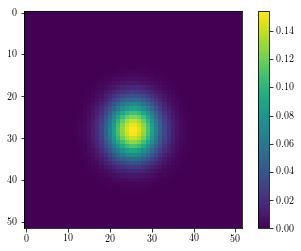

In [41]:
plt.imshow(trueImg.array)
plt.colorbar()

In [50]:
trueImg.calculateHLR()

0.570087712549569

In [42]:
shape_info = realizer.estimate_hsm(lensInfo=test_lensInfo, obsInfo=test_obsInfo)

In [43]:
shape_info

{'e1': -0.11789140850305557,
 'e2': -0.0042729428969323635,
 'flux': 19.956581115722656,
 'nx': 52,
 'ny': 52,
 'size': 0.45038928985595705,
 'x': 0.05275762857948969,
 'y': 0.30239148148598183}

In [44]:
emulatedImg = realizer.draw_emulated_system(lensInfo=test_lensInfo, obsInfo=test_obsInfo)

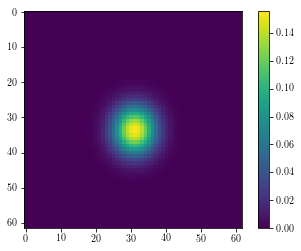

In [45]:
plt.imshow(emulatedImg.array)
plt.colorbar()

In [49]:
trueImg.calculateMomentRadius()

0.4758328923827062

In [16]:
np.allclose(true_tot_flux, shape_info['flux'])

False

In [17]:
true_tot_flux, shape_info['flux']

(19.884445805602063, 19.956581115722656)

In [84]:
g = galsim.Gaussian(half_light_radius=0.5, flux=20).shear(e1=-0.11, e2=-0.004)
ti = g.drawImage(scale=0.1)
h = ti.FindAdaptiveMom()
h

galsim.hsm.ShapeData(image_bounds=galsim.BoundsI(xmin=1, xmax=56, ymin=1, ymax=56), moments_status=0, observed_shape=galsim.Shear((-0.05491315392011255-0.0019968655433851876j)), moments_sigma=4.256483554840088, moments_amp=20.000038146972656, moments_centroid=galsim.PositionD(x=28.5000003238549, y=28.499999975228405), moments_rho4=1.9999968681764737, moments_n_iter=6)

In [85]:
ti.array.shape

(56, 56)

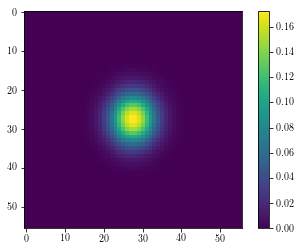

In [86]:
plt.imshow(ti.array)
plt.colorbar()

In [90]:
g_e = galsim.Gaussian(sigma=h.moments_sigma*0.1, flux= h.moments_amp).shear(e1=h.observed_shape.e1, e2=h.observed_shape.e2)

In [91]:
te = g_e.drawImage(scale=0.1)

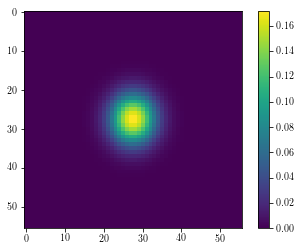

In [92]:
plt.imshow(te.array)
plt.colorbar()

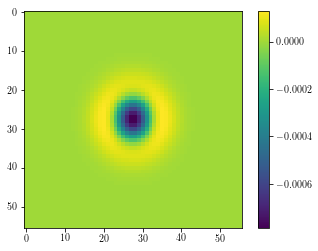

In [93]:
plt.imshow(te.array-ti.array)
plt.colorbar()